In [1]:
from sat.solvers.neurosat import NeuroSAT
from sat.data import *
import matplotlib.pyplot as plt
from torch.utils.data.dataloader import DataLoader
from sat.attacks import attack_random, attack_opt

In [2]:
def plot_perturbations(attack, opt, n, model_path):
    model = NeuroSAT()
    model.cuda()
    model.load_state_dict(torch.load(model_path))
    if attack == "sat":
        val = get_NSAT_val_data("SAT-10-40-true")
    else:
        val = get_NSAT_val_data("SAT-10-40-false")
    dl_val = DataLoader(dataset=val, collate_fn=model.collate_fn, shuffle=False, batch_size=2)

    plt.rcParams["figure.figsize"] = (20,10)

    for i, batch in enumerate(dl_val):
        _, axs = plt.subplots(1, 2 if attack == "adc" else 3)
        axs[0].imshow(batch['adj'].detach().cpu())
        axs[0].set_xticks([])
        axs[0].set_yticks([])
        axs[0].set_title("Clean Adjacency")
        adj_before = copy.deepcopy(batch['adj'].detach().cpu())
        if opt:
            sample_new = attack_opt(attack, model, batch)
        else:
            sample_new = attack_random(attack, model, batch)
        axs[1].imshow(sample_new['adj'].detach().cpu())
        axs[1].set_xticks([])
        axs[1].set_yticks([])
        axs[1].set_title("Perturbed Adjacency")
        if attack != "adc":
            axs[2].imshow(sample_new['adj'].detach().cpu() - adj_before)
            axs[2].set_xticks([])
            axs[2].set_yticks([])
            axs[2].set_title("Difference")
        plt.show()
        if i == n-1:
            break

In [3]:
path = "trained_models/pretrained_nsat.pt"

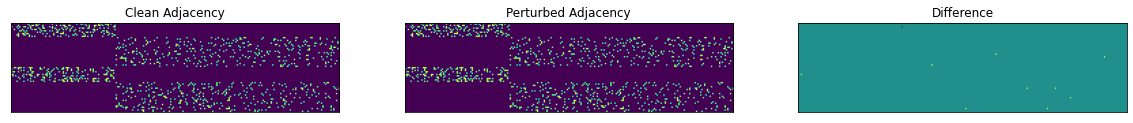

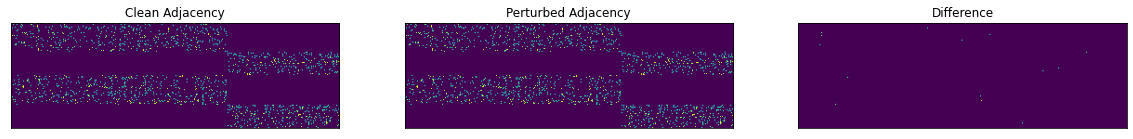

In [4]:
plot_perturbations("sat", False, 2, path)

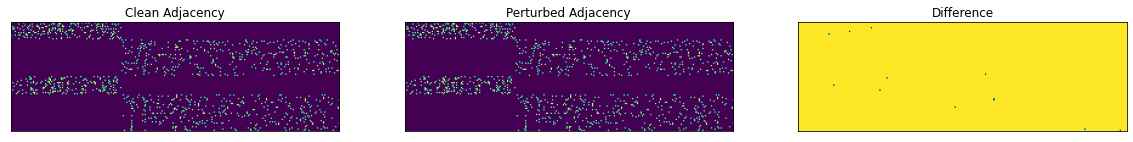

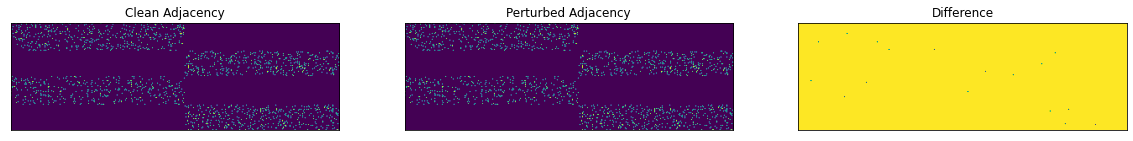

In [5]:
plot_perturbations("del", False, 2, path)

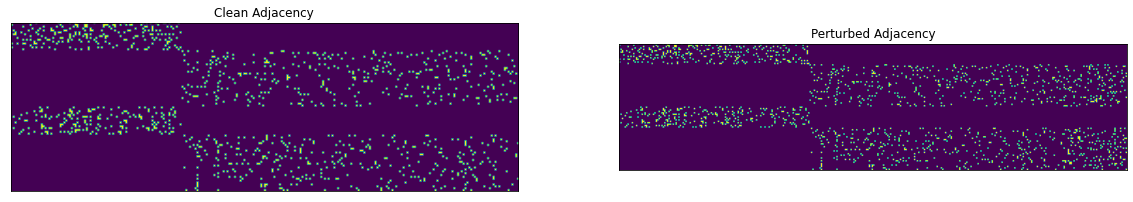

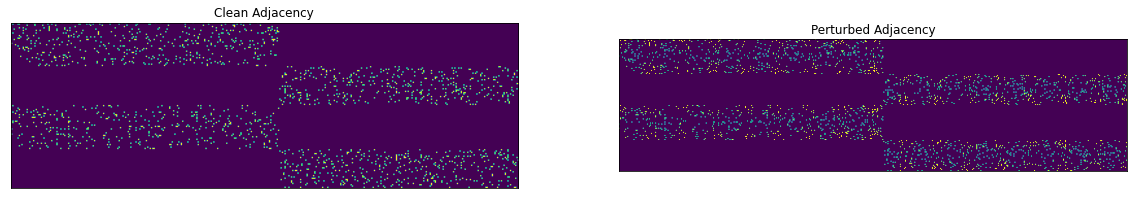

In [6]:
plot_perturbations("adc", False, 2, path)

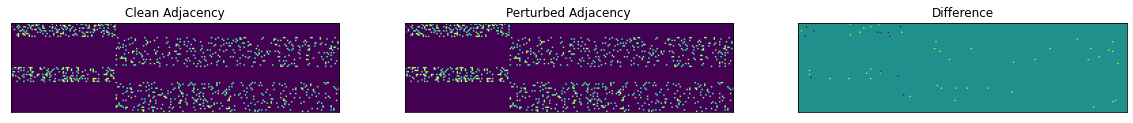

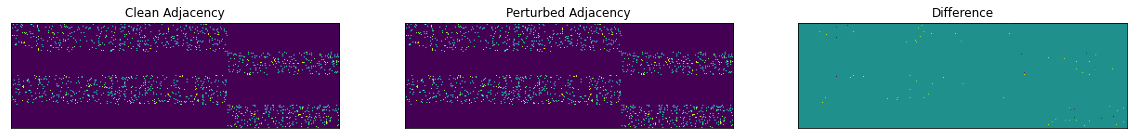

In [7]:
plot_perturbations("sat", True, 2, path)

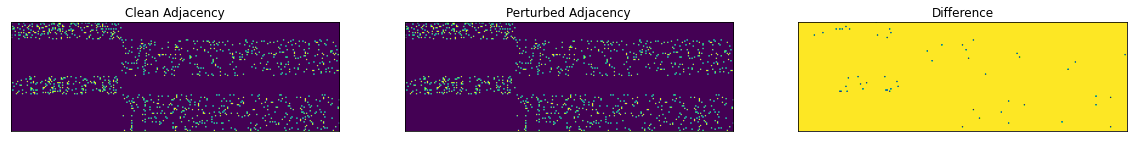

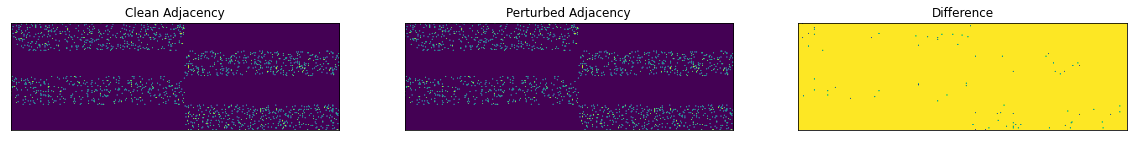

In [8]:
plot_perturbations("del", True, 2, path)

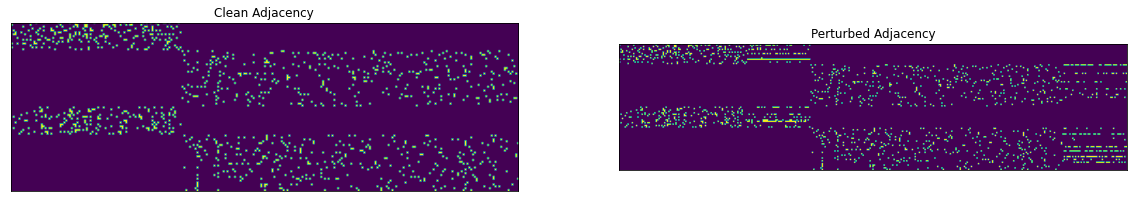

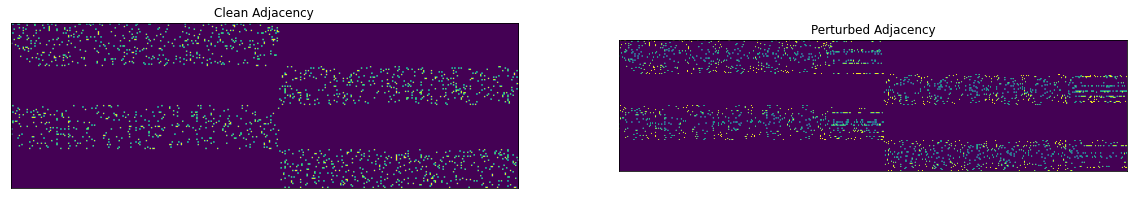

In [9]:
plot_perturbations("adc", True, 2, path)